In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from refnx.dataset import Data1D
from refnx.reflect import MaterialSLD, SLD, Slab, Structure, ReflectModel
from refnx.analysis import CurveFitter, Objective, Parameter

In [11]:
# load the data
data = Data1D('c_PLP0011859_q.txt')

In [27]:
# create Scatterers
si = MaterialSLD('Si', 2.33)
sio2 = MaterialSLD('SiO2', 2.2)
d2o = MaterialSLD('D2O', 1.107)
polymer = SLD(2.3)

# create Slabs from the scatterers
sio2_l = sio2(15, 3)
polymer_l = polymer(200, 3)

In [28]:
# create a structure and model
s = si | sio2_l | polymer_l | d2o(0, 3)
model = ReflectModel(s)

In [34]:
# parameters we want to fit
sio2_l.thick.setp(vary=True, bounds=(5, 30))
sio2.density.setp(vary=True, bounds=(2.25, 2.33))

polymer_l.thick.setp(vary=True, bounds=(200, 300))
polymer.real.setp(vary=True, bounds=(2.0, 3.0))
polymer_l.rough.setp(vary=True, bounds=(1, 10))

# this would correspond to the liquid/polymer interface
s[-1].rough.setp(vary=True, bounds=(1, 10))

model.bkg.setp(vary=True, bounds=(1e-7, 1e-6))

In [35]:
objective = Objective(model, data)

In [36]:
fitter = CurveFitter(objective)

In [37]:
fitter.fit('differential_evolution')

24it [00:02,  8.32it/s]


   covar: array([[ 2.92485595e-16, -9.48467500e-10,  1.22218776e-11,
         5.44773160e-10, -2.57348289e-11, -8.17186622e-10,
         8.17828821e-10],
       [-9.48467500e-10,  1.03812016e+00, -2.23644873e-02,
        -7.71594550e-01,  4.49818879e-03, -6.48074411e-01,
        -9.24532295e-02],
       [ 1.22218776e-11, -2.23644873e-02,  5.53244864e-04,
         1.67600799e-02, -6.92929931e-05,  1.60728569e-02,
         1.99759189e-03],
       [ 5.44773160e-10, -7.71594550e-01,  1.67600799e-02,
         5.82309012e-01, -3.10145149e-03,  4.91328296e-01,
         6.68793674e-02],
       [-2.57348289e-11,  4.49818879e-03, -6.92929931e-05,
        -3.10145149e-03,  9.93204910e-05, -3.01921722e-03,
        -7.14800621e-04],
       [-8.17186622e-10, -6.48074411e-01,  1.60728569e-02,
         4.91328296e-01, -3.01921722e-03,  6.03039029e-01,
         4.67781792e-02],
       [ 8.17828821e-10, -9.24532295e-02,  1.99759189e-03,
         6.68793674e-02, -7.14800621e-04,  4.67781792e-02,
        

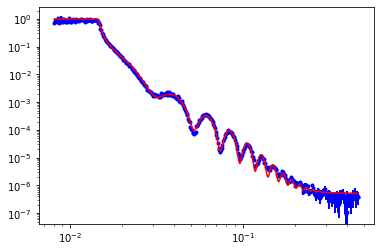

In [40]:
objective.plot()
plt.yscale('log')
plt.xscale('log')

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f93839996d0>)

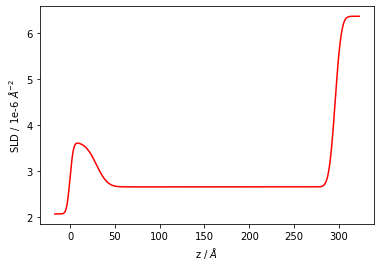

In [41]:
s.plot()